In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt
import matplotlib.ticker as plticker
from statsmodels.tsa.stattools import adfuller
from io import StringIO
import statsmodels.tsa.stattools as tsa
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df_full = pd.read_csv('Opentable_dataset.csv')

In [4]:
df_full.head(10)

Type            Name 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20 2/23/20  \
0  country          Global     -1%      3%     -1%     -2%      1%      4%   
1  country       Australia     -3%     -6%     -3%     -1%      0%      0%   
2  country          Canada     -5%      0%     -3%     -2%     -1%      8%   
3  country         Germany     11%      4%      3%      5%      1%      2%   
4  country         Ireland      2%      0%      4%      1%     -3%      4%   
5  country          Mexico     -5%     -5%     -4%     -3%     -1%      2%   
6  country  United Kingdom      1%     -1%     -2%      0%     -1%     -4%   
7  country   United States      0%      4%      0%     -1%      2%      6%   
8    state         Alabama    -14%      7%      1%     -2%      8%      2%   
9    state         Alberta      2%     10%      2%      1%      5%      0%   

  2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20  \
0      1%      1%     -2%     -3%     -1%      1%     0%    -8%    -9%    -6%   
1      0%     -2%     -2%     -7%      0%     -1%     4%   -12%    -6%   -12%   
2     -2%     -3%      1%    -12%     -8%     -4%    -7%   -12%    -7%    -2%   
3     11%      4%      5%      5%     11%      7%     9%    -8%     0%    -4%   
4     -9%     -8%    -10%     -2%    -10%    -13%    10%    -6%    -7%    -1%   
5     -1%     -3%     -9%     -7%    -10%     -5%    -7%    -7%   -10%    -6%   
6     -6%     -5%     -5%     -8%     -2%     -3%    -2%    -7%   -11%    -9%   
7      2%      2%     -1%     -1%      1%      3%     2%    -7%    -9%    -5%   
8      1%      0%     -8%     -3%     -3%    -11%     2%   -32%   -29%   -23%   
9     -1%      3%     -1%     -4%      3%      2%    -4%   -10%    -4%    -1%   

  3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20  \
0    -7%    -7%    -4%    -3%   -14%    -18%    -19%    -28%    -36%    -40%   
1    -8%    -6%    -3%    -4%   -10%     -4%    -10%    -12%     -8%    -11%   
2    -4%    -8%    -9%    -1%   -13%    -18%    -19%    -28%    -40%    -41%   
3    -6%    -7%     4%    11%   -10%    -16%    -11%    -17%    -28%    -38%   
4   -15%   -13%    -5%     4%   -10%    -28%    -27%    -46%    -51%    -52%   
5    -6%    -8%    -2%    -5%   -19%    -16%    -15%    -16%    -16%    -21%   
6   -12%    -5%    -3%     1%   -18%    -17%    -14%    -24%    -26%    -20%   
7    -5%    -6%    -3%    -2%   -14%    -18%    -19%    -28%    -36%    -42%   
8   -15%    -3%    11%   -10%   -11%    -26%     -8%     -2%    -24%    -28%   
9    -8%     1%   -16%    -7%   -13%    -10%     -8%    -23%    -43%    -44%   

  3/15/20 3/16/20 3/17/20 3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0    -47%    -56%    -83%    -89%  -96.03%  -97.94%  -98.96%  -99.24%   
1    -12%    -30%    -43%    -50%     -53%  -51.67%  -53.61%  -65.53%   
2    -47%    -60%    -94%    -97%  -99.47%  -99.72%  -99.89%  -99.94%   
3    -46%    -63%    -90%    -95%  -98.36%  -98.79%  -99.78%  -99.96%   
4    -75%    -70%    -86%    -97%  -98.55%  -99.08%  -98.76%  -98.31%   
5    -35%    -48%    -62%    -73%  -78.41%  -85.12%  -90.81%  -95.20%   
6    -31%    -52%    -82%    -88%  -91.08%  -93.93%  -99.96%  -99.99%   
7    -48%    -56%    -84%    -91%  -97.54%  -99.35%  -99.89%  -99.93%   
8    -38%    -57%    -74%    -78%  -96.77%    -100%    -100%    -100%   
9    -49%    -65%    -89%    -96%  -98.49%  -99.13%  -99.65%  -99.81%   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
0  -99.68%  -99.72%  -99.75%  -99.79%  -99.83%  -99.85%  -99.89%  -99.83%   
1  -99.82%    -100%    -100%    -100%    -100%    -100%    -100%    -100%   
2  -99.97%  -99.99%  -99.97%  -99.98%  -99.98%    -100%    -100%    -100%   
3    -100%    -100%    -100%    -100%    -100%    -100%    -100%    -100%   
4    -100%  -99.55%    -100%    -100%    -100%    -100%    -100%    -100%   
5  -94.60%  -95.81%  -96.60%  -97.33%  -97.12%  -97.09%  -98.51%  -97.87%   
6    -100%    -100%    -100%   

In [5]:
#20 of the biggest "foodie" ciites in the country 
#based off June 2022, article "https://www.2foodtrippers.com/best-food-cities-in-the-us/""

list=['District of Columbia', 'Philadelphia', 'Cincinnati', 'Honolulu', 'New York', 'Las Vegas', 'Phoenix', 'Nashville', 'San Francisco', 'Houston', 'Boston', 'Portland', 'Los Angeles', 'Dallas', 'New Orleans', 'Denver', 'Chicago', 'Austin', 'Seattle', 'Atlanta', 'Miami']

df = df_full[df_full.Name.isin(list)]
df

Type                  Name 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20  \
19   state  District of Columbia     -5%     55%      8%      0%      8%   
45   state              New York     -1%     11%      1%     -4%      1%   
68    city               Atlanta      6%      9%     -5%     -5%     -3%   
69    city                Austin      0%     -6%      2%      3%      2%   
74    city                Boston      5%     15%     -3%    -12%     -2%   
79    city               Chicago     -7%     -3%     -5%     -4%      7%   
80    city            Cincinnati      7%      1%     -6%     -6%     -8%   
84    city                Dallas      6%     -4%      1%      3%     -3%   
85    city                Denver     -1%    -12%     -9%     14%      2%   
91    city              Honolulu     -3%      1%      3%      9%      9%   
92    city               Houston     -2%     -8%     -3%      3%      1%   
95    city             Las Vegas    -22%    -19%     -6%      0%     -4%   
97    city           Los Angeles      7%      6%      9%      1%      8%   
100   city                 Miami      0%     -8%     -5%      1%      5%   
107   city             Nashville     13%      7%    -10%      7%     10%   
108   city           New Orleans     -9%      1%     14%     23%     10%   
109   city              New York      1%     11%      3%      0%      3%   
111   city          Philadelphia     10%     55%     11%      1%      2%   
112   city               Phoenix     -4%      0%     11%     -1%      0%   
114   city              Portland      1%     -4%      7%     11%      6%   
118   city         San Francisco    -15%    -11%     -4%     -8%     -9%   
121   city               Seattle      8%     11%      6%      1%      1%   

    2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20  \
19      15%     11%      8%      8%      1%      3%      2%     5%     0%   
45      13%      6%      1%     -1%     -5%     -2%     -1%     0%    -7%   
68      -7%     -6%      1%     -3%     -4%      7%      1%     8%   -17%   
69       5%      3%      5%     -3%      0%      8%      9%     2%     0%   
74      14%      5%      3%      1%     12%      1%     22%     1%     1%   
79      11%     -6%    -16%    -15%     -8%     -8%     -3%     1%   -21%   
80     -12%     -8%     -7%    -33%    -15%    -16%    -11%     4%    -5%   
84      -2%     -2%     14%      1%     -7%      6%     10%    11%     1%   
85      -3%    -10%    -12%     -2%     -2%      1%     27%    38%     3%   
91      -1%      5%      0%      7%      0%      0%     -6%    -9%    -6%   
92     -10%      4%      7%      9%      1%     -6%     -6%     2%     2%   
95       7%     -2%     -3%    -17%     -9%    -10%     -6%   -17%   -28%   
97      29%     12%     15%      5%      0%      8%     13%    -3%    -1%   
100     -7%     17%      1%     -9%      0%      0%      4%   -18%   -13%   
107    -12%    -14%    -12%    -14%      4%     12%      3%    -3%     2%   
108     21%    109%    102%      9%    -21%    -21%    -16%   -27%   -47%   
109     13%      7%      1%      1%     -2%      1%     -2%    -2%    -6%   
111      6%     -2%     -2%     10%     13%     11%      7%    21%    13%   
112      1%      7%      3%     -2%     -2%      7%     -5%   -11%   -13%   
114     22%     14%     -7%     17%      4%     -4%      4%     9%     5%   
118     -9%      9%     16%     12%      5%     -8%    -10%   -18%   -22%   
121     12%      1%      0%      3%      5%      7%      0%   -18%   -29%   

    3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20  \
19     -9%     7%    -5%    -6%     0%     0%   -10%    -18%    -22%    -38%   
45    -11%    -9%    -8%   -14%   -10%    -2%   -15%    -27%    -32%    -49%   
68    -21%   -11%    -9%    -2%     1%    13%     1%    -14%    -14%    -26%   
69     -8%   -11%    -6%     0%   -13%   -23%   -41%    -31%    -30%    -27%   
74    -10%    -4%    11%     7%    -1%    10%   -14%    -29%    -30%    -47%   
79   

In [6]:
#since I am only comparing cities, I am dropping index "45" which is NY state
df.drop([45], inplace=True)

/Users/julietday/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df.head()

Type                  Name 2/18/20 2/19/20 2/20/20 2/21/20 2/22/20  \
19  state  District of Columbia     -5%     55%      8%      0%      8%   
68   city               Atlanta      6%      9%     -5%     -5%     -3%   
69   city                Austin      0%     -6%      2%      3%      2%   
74   city                Boston      5%     15%     -3%    -12%     -2%   
79   city               Chicago     -7%     -3%     -5%     -4%      7%   

   2/23/20 2/24/20 2/25/20 2/26/20 2/27/20 2/28/20 2/29/20 3/1/20 3/2/20  \
19     15%     11%      8%      8%      1%      3%      2%     5%     0%   
68     -7%     -6%      1%     -3%     -4%      7%      1%     8%   -17%   
69      5%      3%      5%     -3%      0%      8%      9%     2%     0%   
74     14%      5%      3%      1%     12%      1%     22%     1%     1%   
79     11%     -6%    -16%    -15%     -8%     -8%     -3%     1%   -21%   

   3/3/20 3/4/20 3/5/20 3/6/20 3/7/20 3/8/20 3/9/20 3/10/20 3/11/20 3/12/20  \
19    -9%     7%    -5%    -6%     0%     0%   -10%    -18%    -22%    -38%   
68   -21%   -11%    -9%    -2%     1%    13%     1%    -14%    -14%    -26%   
69    -8%   -11%    -6%     0%   -13%   -23%   -41%    -31%    -30%    -27%   
74   -10%    -4%    11%     7%    -1%    10%   -14%    -29%    -30%    -47%   
79   -16%   -10%   -11%    -8%     4%    13%   -25%    -23%    -27%    -31%   

   3/13/20 3/14/20 3/15/20 3/16/20 3/17/20 3/18/20  3/19/20  3/20/20  3/21/20  \
19    -44%    -44%    -55%    -77%   -100%   -100%    -100%    -100%    -100%   
68    -35%    -34%    -44%    -78%    -93%    -96%  -96.80%  -99.35%    -100%   
69    -35%    -36%    -54%    -71%    -99%   -100%    -100%    -100%    -100%   
74    -56%    -64%    -70%    -81%   -100%   -100%    -100%    -100%    -100%   
79    -37%    -49%    -53%    -75%   -100%   -100%  -99.98%    -100%  -99.99%   

   3/22/20  3/23/20 3/24/20  3/25/20 3/26/20 3/27/20 3/28/20 3/29/20 3/30/20  \
19   -100%    -100%   -100%    -100%   -100%   -100%   -100%   -100%   -100%   
68   -100%    -100%   -100%    -100%   -100%   -100%   -100%   -100%   -100%   
69   -100%    -100%   -100%  -99.28%   -100%   -100%   -100%   -100%   -100%   
74   -100%    -100%   -100%    -100%   -100%   -100%   -100%   -100%   -100%   
79   -100%  -99.98%   -100%    -100%   -100%   -100%   -100%   -100%   -100%   

   3/31/20   4/1/20 4/2/20 4/3/20 4/4/20 4/5/20 4/6/20 4/7/20 4/8/20 4/9/20  \
19   -100%    -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%   
68   -100%  -99.67%  -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%   
69   -100%    -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%   
74   -100%    -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%   
79   -100%    -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%  -100%   

    4/10/20 4/11/20 4/12/20 4/13/20 4/14/20  4/15/20  4/16/20  4/17/20  \
19    -100%   -100%   -100%   -100%   -100%    -100%    -100%    -100%   
68    -100%   -100%   -100%   -100%   -100%  -99.60%  -99.61%  -99.53%   
69  -99.26%   -100%   -100%   -100%   -100%    -100%    -100%    -100%   
74    -100%   -100%   -100%   -100%   -100%    -100%    -100%    -100%   
79    -100%   -100%   -100%   -100%   -100%    -100%    -100%    -100%   

   4/18/20 4/19/20 4/20/20 4/21/20 4/22/20 4/23/20 4/24/20 4/25/20 4/26/20  \
19   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   
68   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   
69   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   
74   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   
79   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   -100%   

    4/27/20  4/28/20  4/29/20  4/30/20   5/1/20   5/2/20   5/3/20   5/4/20  \
19    -100%    -100%    -100%    -100%    -100%    -100%    -100%    -100%   
68  -98.87%  -98.14%  -98.96%  -98.47%  -97.25%  -97.59%  -98.12%  -96.83%   
69    -100%    -100%    -100%  

In [8]:
#transpose data and set date to index in order to timeseries

In [9]:
df.set_index('Name', inplace = True)

In [10]:
df = df.transpose()

In [11]:
df.head(20)

Name    District of Columbia Atlanta Austin Boston Chicago Cincinnati Dallas  \
Type                   state    city   city   city    city       city   city   
2/18/20                  -5%      6%     0%     5%     -7%         7%     6%   
2/19/20                  55%      9%    -6%    15%     -3%         1%    -4%   
2/20/20                   8%     -5%     2%    -3%     -5%        -6%     1%   
2/21/20                   0%     -5%     3%   -12%     -4%        -6%     3%   
2/22/20                   8%     -3%     2%    -2%      7%        -8%    -3%   
2/23/20                  15%     -7%     5%    14%     11%       -12%    -2%   
2/24/20                  11%     -6%     3%     5%     -6%        -8%    -2%   
2/25/20                   8%      1%     5%     3%    -16%        -7%    14%   
2/26/20                   8%     -3%    -3%     1%    -15%       -33%     1%   
2/27/20                   1%     -4%     0%    12%     -8%       -15%    -7%   
2/28/20                   3%      7%     8%     1%     -8%       -16%     6%   
2/29/20                   2%      1%     9%    22%     -3%       -11%    10%   
3/1/20                    5%      8%     2%     1%      1%         4%    11%   
3/2/20                    0%    -17%     0%     1%    -21%        -5%     1%   
3/3/20                   -9%    -21%    -8%   -10%    -16%       -16%    -6%   
3/4/20                    7%    -11%   -11%    -4%    -10%        -9%    -8%   
3/5/20                   -5%     -9%    -6%    11%    -11%        -6%     0%   
3/6/20                   -6%     -2%     0%     7%     -8%       -21%     3%   
3/7/20                    0%      1%   -13%    -1%      4%       -14%    -1%   

Name    Denver Honolulu Houston Las Vegas Los Angeles Miami Nashville  \
Type      city     city    city      city        city  city      city   
2/18/20    -1%      -3%     -2%      -22%          7%    0%       13%   
2/19/20   -12%       1%     -8%      -19%          6%   -8%        7%   
2/20/20    -9%       3%     -3%       -6%          9%   -5%      -10%   
2/21/20    14%       9%      3%        0%          1%    1%        7%   
2/22/20     2%       9%      1%       -4%          8%    5%       10%   
2/23/20    -3%      -1%    -10%        7%         29%   -7%      -12%   
2/24/20   -10%       5%      4%       -2%         12%   17%      -14%   
2/25/20   -12%       0%      7%       -3%         15%    1%      -12%   
2/26/20    -2%       7%      9%      -17%          5%   -9%      -14%   
2/27/20    -2%       0%      1%       -9%          0%    0%        4%   
2/28/20     1%       0%     -6%      -10%          8%    0%       12%   
2/29/20    27%      -6%     -6%       -6%         13%    4%        3%   
3/1/20     38%      -9%      2%      -17%         -3%  -18%       -3%   
3/2/20      3%      -6%      2%      -28%         -1%  -13%        2%   
3/3/20     -9%      -9%     -8%      -31%          4%  -15%      -14%   
3/4/20     -3%     -11%     -8%      -13%          7%   -6%        2%   
3/5/20    -10%     -13%      7%       -9%         -5%   -2%       -3%   
3/6/20     -9%     -12%      6%       -8%          1%  -11%        0%   
3/7/20     -6%      -9%     10%       -7%         -2%   -2%        5%   

Name    New Orleans New York Philadelphia Phoenix Portland San Francisco  \
Type           city     city         city    city     city          city   
2/18/20         -9%       1%          10%     -4%       1%          -15%   
2/19/20          1%      11%          55%      0%      -4%          -11%   
2/20/20         14%       3%          11%     11%       7%           -4%   
2/21/20         23%       0%           1%     -1%      11%           -8%   
2/22/20         10%       3%           2%      0%       6%           -9%   
2/23/20         21%      13%           6%      1%      22%           -9%   
2/24/20        109%       7%          -2%      7%      14%            9%   
2/25/20        102%       1%          -2%      3%      -7%           16%   
2/26/20          9%      

In [12]:
#drop row labeled "type" as it is no longer necessary
df = df.drop(["Type"])

In [13]:
df = df.set_index(pd.to_datetime(df.index))

In [14]:
print(f"Now our index is a {type(df.index)}")

Now our index is a <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2020-02-18 to 2022-06-13
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District of Columbia  847 non-null    object
 1   Atlanta               847 non-null    object
 2   Austin                847 non-null    object
 3   Boston                847 non-null    object
 4   Chicago               847 non-null    object
 5   Cincinnati            847 non-null    object
 6   Dallas                847 non-null    object
 7   Denver                847 non-null    object
 8   Honolulu              847 non-null    object
 9   Houston               847 non-null    object
 10  Las Vegas             847 non-null    object
 11  Los Angeles           847 non-null    object
 12  Miami                 847 non-null    object
 13  Nashville             847 non-null    object
 14  New Orleans           847 non-null    object
 15  New York             

In [16]:
df.describe()

Name   District of Columbia Atlanta Austin Boston Chicago Cincinnati Dallas  \
count                   847     847    847    847     847        847    847   
unique                  753     767    773    749     751        753    770   
top                   -100%   -100%  -100%  -100%   -100%      -100%  -100%   
freq                     58      33     42     61      60         57     40   

Name   Denver Honolulu Houston Las Vegas Los Angeles  Miami Nashville  \
count     847      847     847       847         847    847       847   
unique    750      742     765       761         708    754       766   
top     -100%    -100%   -100%     -100%       -100%  -100%     -100%   
freq       60       65      37        52          96     59        52   

Name   New Orleans New York Philadelphia Phoenix Portland San Francisco  \
count          847      847          847     847      847           847   
unique         754      744          736     768      733           701   
top          -100%    -100%        -100%   -100%    -100%         -100%   
freq            57       57           66      50       62            53   

Name   Seattle  
count      847  
unique     744  
top      -100%  
freq        56

In [17]:
df.index

DatetimeIndex(['2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27',
               ...
               '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07',
               '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-11',
               '2022-06-12', '2022-06-13'],
              dtype='datetime64[ns]', length=847, freq=None)

In [18]:
df[df.columns] = df[df.columns].replace('[%]', '', regex=True).astype(float)/100

In [19]:
df.head()

Name        District of Columbia  Atlanta  Austin  Boston  Chicago  \
2020-02-18                 -0.05     0.06    0.00    0.05    -0.07   
2020-02-19                  0.55     0.09   -0.06    0.15    -0.03   
2020-02-20                  0.08    -0.05    0.02   -0.03    -0.05   
2020-02-21                  0.00    -0.05    0.03   -0.12    -0.04   
2020-02-22                  0.08    -0.03    0.02   -0.02     0.07   

Name        Cincinnati  Dallas  Denver  Honolulu  Houston  Las Vegas  \
2020-02-18        0.07    0.06   -0.01     -0.03    -0.02      -0.22   
2020-02-19        0.01   -0.04   -0.12      0.01    -0.08      -0.19   
2020-02-20       -0.06    0.01   -0.09      0.03    -0.03      -0.06   
2020-02-21       -0.06    0.03    0.14      0.09     0.03       0.00   
2020-02-22       -0.08   -0.03    0.02      0.09     0.01      -0.04   

Name        Los Angeles  Miami  Nashville  New Orleans  New York  \
2020-02-18         0.07   0.00       0.13        -0.09      0.01   
2020-02-19         0.06  -0.08       0.07         0.01      0.11   
2020-02-20         0.09  -0.05      -0.10         0.14      0.03   
2020-02-21         0.01   0.01       0.07         0.23      0.00   
2020-02-22         0.08   0.05       0.10         0.10      0.03   

Name        Philadelphia  Phoenix  Portland  San Francisco  Seattle  
2020-02-18          0.10    -0.04      0.01          -0.15     0.08  
2020-02-19          0.55     0.00     -0.04          -0.11     0.11  
2020-02-20          0.11     0.11      0.07          -0.04     0.06  
2020-02-21          0.01    -0.01      0.11          -0.08     0.01  
2020-02-22          0.02     0.00      0.06          -0.09     0.01

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2020-02-18 to 2022-06-13
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District of Columbia  847 non-null    float64
 1   Atlanta               847 non-null    float64
 2   Austin                847 non-null    float64
 3   Boston                847 non-null    float64
 4   Chicago               847 non-null    float64
 5   Cincinnati            847 non-null    float64
 6   Dallas                847 non-null    float64
 7   Denver                847 non-null    float64
 8   Honolulu              847 non-null    float64
 9   Houston               847 non-null    float64
 10  Las Vegas             847 non-null    float64
 11  Los Angeles           847 non-null    float64
 12  Miami                 847 non-null    float64
 13  Nashville             847 non-null    float64
 14  New Orleans           847 non-null    float64
 15  New 

## Resampling

In [21]:
#Resample the dataframe
df_week = df.resample('W').median()

In [22]:
df_week.head(20)

Name        District of Columbia  Atlanta  Austin  Boston  Chicago  \
2020-02-23                  0.08    -0.04    0.02    0.02    -0.04   
2020-03-01                  0.05     0.01    0.03    0.03    -0.08   
2020-03-08                  0.00    -0.09   -0.08    0.01    -0.10   
2020-03-15                 -0.38    -0.26   -0.35   -0.47    -0.31   
2020-03-22                 -1.00    -0.97   -1.00   -1.00    -1.00   
2020-03-29                 -1.00    -1.00   -1.00   -1.00    -1.00   
2020-04-05                 -1.00    -1.00   -1.00   -1.00    -1.00   
2020-04-12                 -1.00    -1.00   -1.00   -1.00    -1.00   
2020-04-19                 -1.00    -1.00   -1.00   -1.00    -1.00   
2020-04-26                 -1.00    -1.00   -1.00   -1.00    -1.00   
2020-05-03                 -1.00    -0.98   -1.00   -1.00    -1.00   
2020-05-10                 -1.00    -0.94   -0.95   -1.00    -1.00   
2020-05-17                 -1.00    -0.91   -0.91   -1.00    -1.00   
2020-05-24                 -0.98    -0.85   -0.82   -1.00    -1.00   
2020-05-31                 -0.97    -0.80   -0.73   -1.00    -1.00   
2020-06-07                 -0.96    -0.82   -0.65   -1.00    -0.94   
2020-06-14                 -0.91    -0.75   -0.61   -0.91    -0.83   
2020-06-21                 -0.91    -0.69   -0.60   -0.81    -0.79   
2020-06-28                 -0.85    -0.66   -0.63   -0.75    -0.80   
2020-07-05                 -0.82    -0.64   -0.66   -0.69    -0.70   

Name        Cincinnati  Dallas  Denver  Honolulu  Houston  Las Vegas  \
2020-02-23       -0.06   -0.01   -0.02      0.02    -0.03      -0.05   
2020-03-01       -0.11    0.06   -0.02      0.00     0.02      -0.09   
2020-03-08       -0.14   -0.01   -0.06     -0.11     0.06      -0.09   
2020-03-15       -0.20   -0.25   -0.20     -0.18    -0.24      -0.20   
2020-03-22       -1.00   -1.00   -1.00     -0.83    -1.00      -1.00   
2020-03-29       -1.00   -1.00   -1.00     -1.00    -1.00      -1.00   
2020-04-05       -1.00   -1.00   -1.00     -1.00    -1.00      -1.00   
2020-04-12       -1.00   -1.00   -1.00     -1.00    -1.00      -1.00   
2020-04-19       -1.00   -1.00   -1.00     -1.00    -1.00      -1.00   
2020-04-26       -1.00   -1.00   -1.00     -1.00    -1.00      -1.00   
2020-05-03       -1.00   -1.00   -1.00     -1.00    -0.99      -1.00   
2020-05-10       -1.00   -0.89   -1.00     -1.00    -0.87      -1.00   
2020-05-17       -1.00   -0.87   -1.00     -1.00    -0.80      -0.96   
2020-05-24       -0.78   -0.76   -1.00     -1.00    -0.72      -0.90   
2020-05-31       -0.61   -0.69   -0.89     -1.00    -0.57      -0.89   
2020-06-07       -0.69   -0.75   -0.82     -1.00    -0.54      -0.78   
2020-06-14       -0.64   -0.60   -0.69     -0.91    -0.54      -0.64   
2020-06-21       -0.49   -0.65   -0.61     -0.89    -0.58      -0.57   
2020-06-28       -0.50   -0.67   -0.58     -0.89    -0.71      -0.60   
2020-07-05       -0.56   -0.74   -0.54     -0.87    -0.72      -0.60   

Name        Los Angeles  Miami  Nashville  New Orleans  New York  \
2020-02-23         0.08  -0.03       0.07         0.12      0.03   
2020-03-01         0.08   0.00      -0.03        -0.16      0.01   
2020-03-08        -0.01  -0.06       0.00        -0.03     -0.10   
2020-03-15        -0.38  -0.22      -0.30        -0.28     -0.52   
2020-03-22        -1.00  -1.00      -0.99        -1.00     -1.00   
2020-03-29        -1.00  -1.00      -1.00        -1.00     -1.00   
2020-04-05        -1.00  -1.00      -1.00        -1.00     -1.00   
2020-04-12        -1.00  -1.00      -1.00        -1.00     -1.00   
2020-04-19        -1.00  -1.00      -1.00        -1.00     -1.00   
2020-04-26        -1.00  -1.00      -1.00        -1.00     -1.00   
2020-05-03        -1.00  -1.00      -1.00        -1.00     -1.00   
2020-05-10        -1.00  -1.00      -1.00        -1.00     -1.00   
2020-05-17        -1.00  -1.00      -0.94        -1.00     -1.00   
2020-05-24        -1.00  -0.95      -0.88        -0.89     -0.99

In [23]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-02-23 to 2022-06-19
Freq: W-SUN
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District of Columbia  122 non-null    float64
 1   Atlanta               122 non-null    float64
 2   Austin                122 non-null    float64
 3   Boston                122 non-null    float64
 4   Chicago               122 non-null    float64
 5   Cincinnati            122 non-null    float64
 6   Dallas                122 non-null    float64
 7   Denver                122 non-null    float64
 8   Honolulu              122 non-null    float64
 9   Houston               122 non-null    float64
 10  Las Vegas             122 non-null    float64
 11  Los Angeles           122 non-null    float64
 12  Miami                 122 non-null    float64
 13  Nashville             122 non-null    float64
 14  New Orleans           122 non-null    float

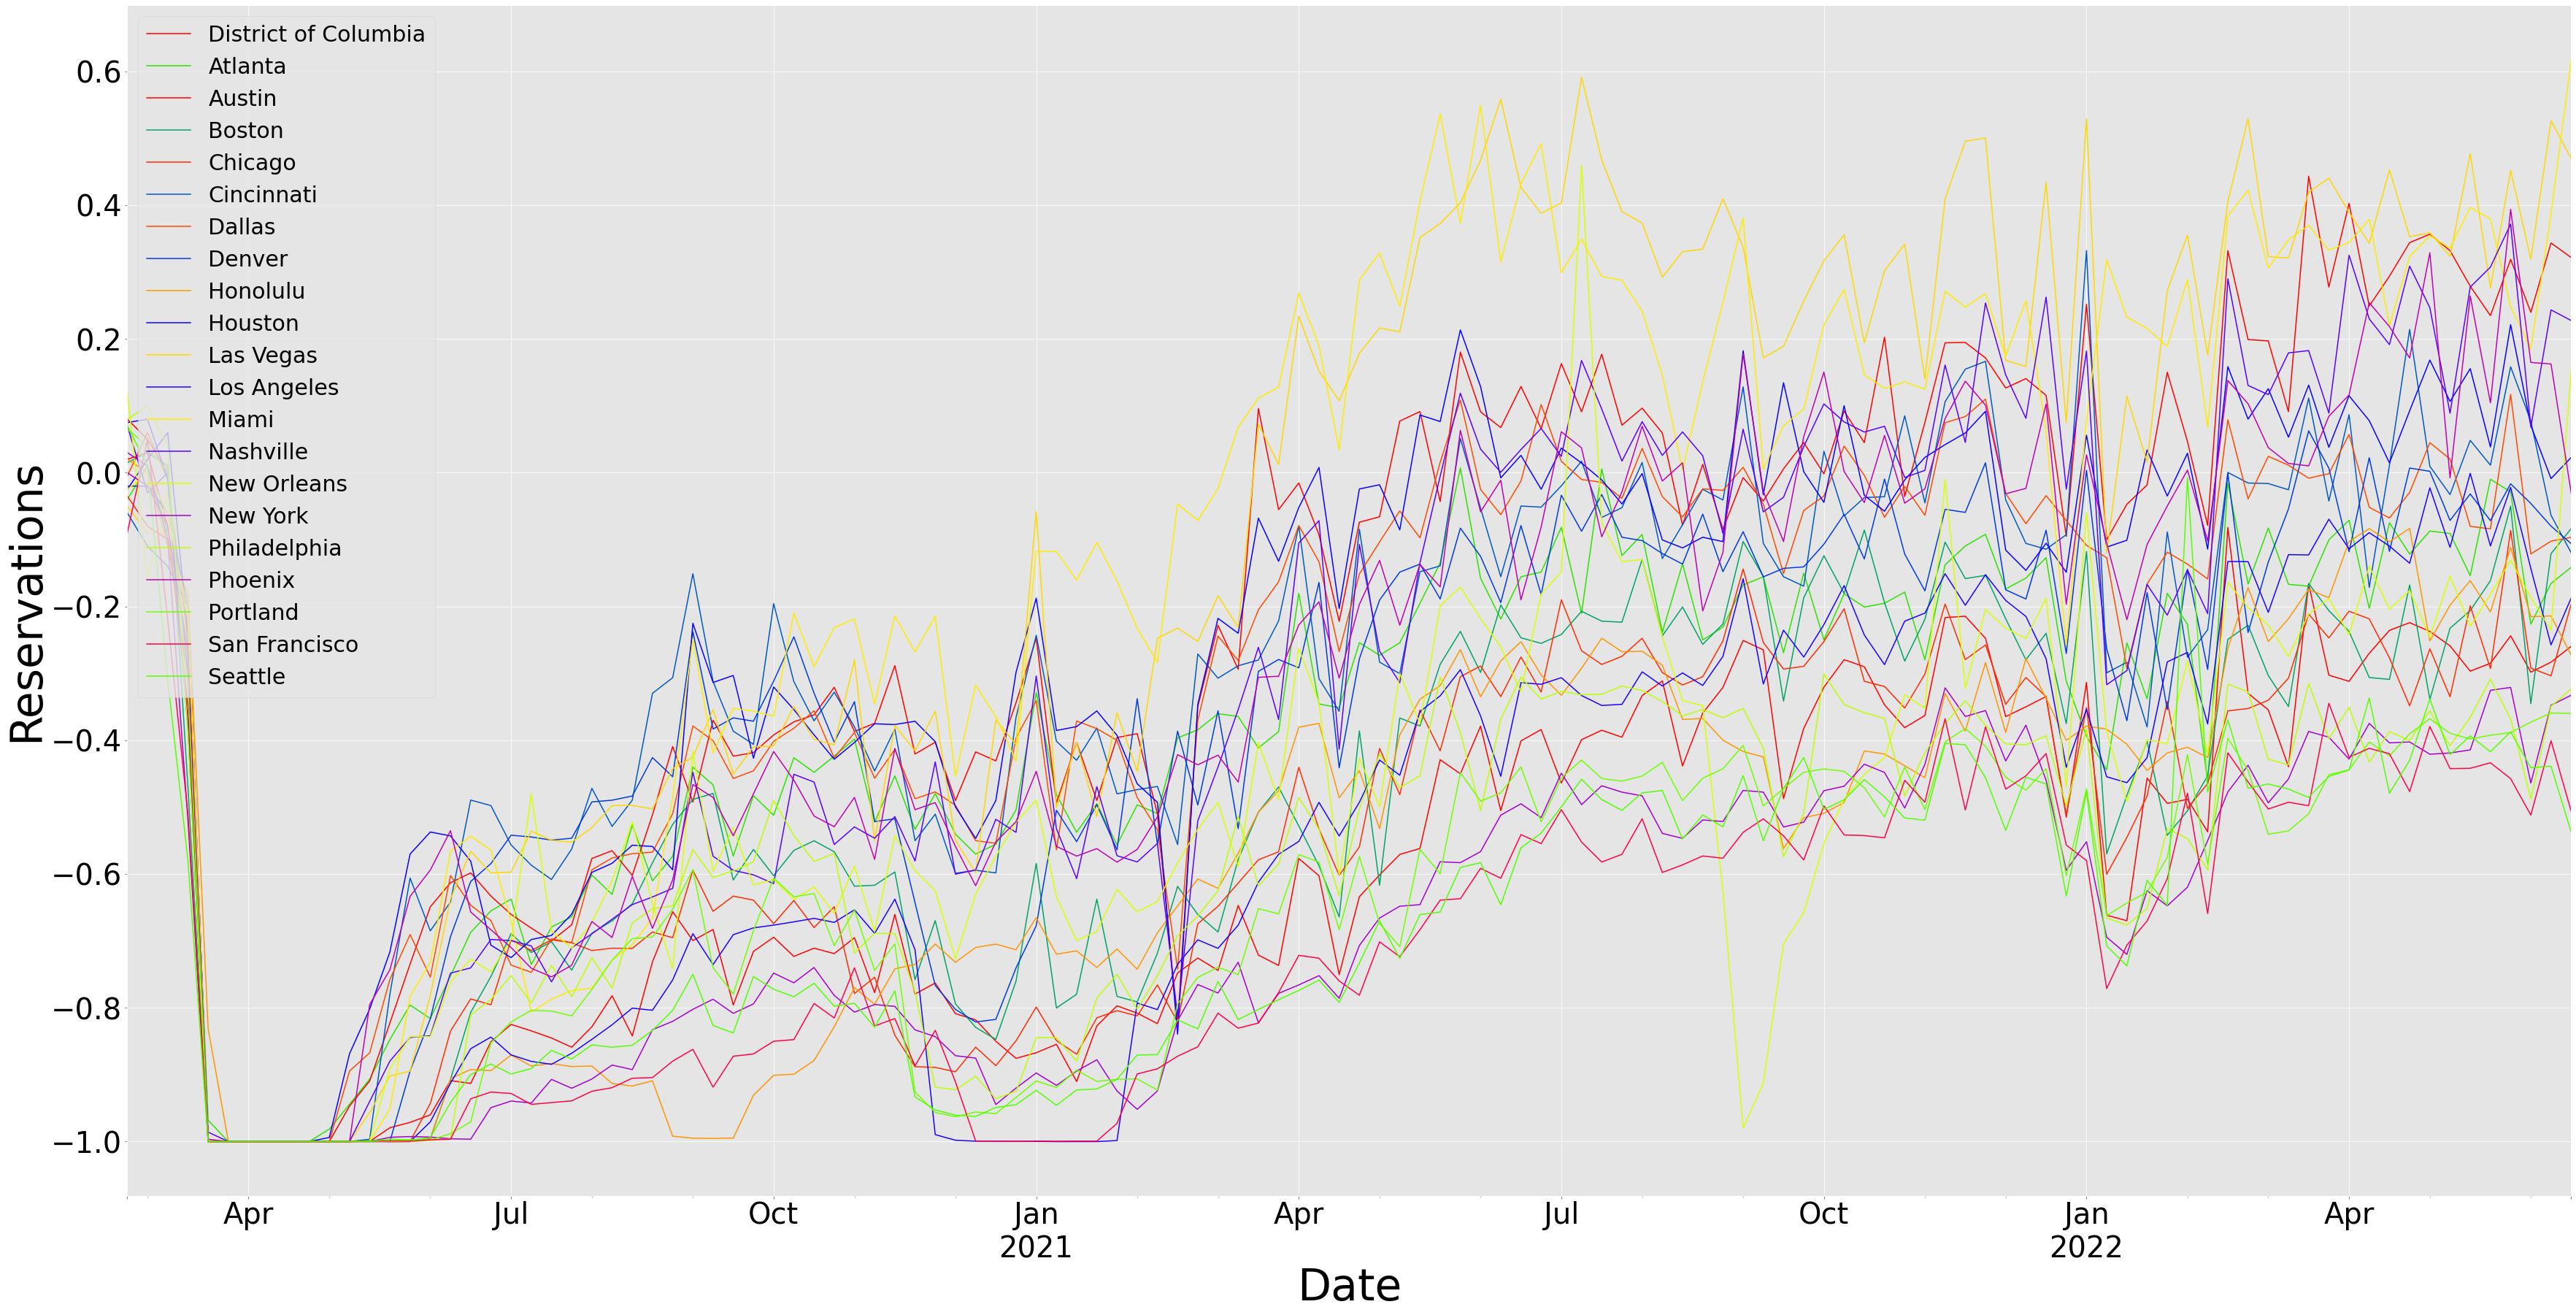

In [24]:
# Plot reservations for all cities  
df_week.plot(figsize=(60, 30), colormap = 'prism')
plt.xlabel("Date", fontsize=60, color = 'black')
plt.ylabel("Reservations",fontsize=60, color = 'black')
plt.xticks(fontsize = 40, color = 'black')
plt.yticks(fontsize = 40, color = 'black')
plt.legend(fontsize = 30, loc = 2)
plt.show()

In [25]:
#df_week.hist(figsize=(15, 15))
#plt.show()

In [26]:
#the cities that have histograms with values above 0 are cities
#that have (at any point) had more reservations YOY since 2019 

In [27]:
#df_week.plot(figsize=(20, 50), colormap = 'Dark2', subplots=True)
#plt.show()

## Dicky Fuller test

In [28]:
adf_results = {}
for col in df_week.columns.values:  
    adf_results[col] = tsa.adfuller(df_week[col])

adf_results

{'District of Columbia': (-2.001582801054211,
  0.28587952759903457,
  3,
  118,
  {'1%': -3.4870216863700767,
   '5%': -2.8863625166643136,
   '10%': -2.580009026141913},
  -223.64688118553215),
 'Atlanta': (-2.179406141242274,
  0.21380455481465682,
  2,
  119,
  {'1%': -3.4865346059036564,
   '5%': -2.8861509858476264,
   '10%': -2.579896092790057},
  -221.05738148107753),
 'Austin': (-1.3084589211398137,
  0.6252935160016944,
  2,
  119,
  {'1%': -3.4865346059036564,
   '5%': -2.8861509858476264,
   '10%': -2.579896092790057},
  -158.60757737061084),
 'Boston': (-2.271970117213541,
  0.18116756107971244,
  2,
  119,
  {'1%': -3.4865346059036564,
   '5%': -2.8861509858476264,
   '10%': -2.579896092790057},
  -194.25173010605295),
 'Chicago': (-2.0655668258877293,
  0.25858378242108515,
  1,
  120,
  {'1%': -3.486055829282407,
   '5%': -2.8859430324074076,
   '10%': -2.5797850694444446},
  -262.8648714366923),
 'Cincinnati': (-1.8503923518028018,
  0.35574554787005197,
  3,
  118,
  

In [29]:
# loop over dictionary data
non_stationary = []
stationary = []
for key, value in adf_results.items():
    if value[1] > 0.05:
        non_stationary.append(key)
    else:
        stationary.append(key)
print (non_stationary)
print (stationary)

['District of Columbia', 'Atlanta', 'Austin', 'Boston', 'Chicago', 'Cincinnati', 'Dallas', 'Denver', 'Honolulu', 'Houston', 'Las Vegas', 'Los Angeles', 'Miami', 'Nashville', 'New Orleans', 'New York', 'Philadelphia', 'Phoenix', 'Seattle']
['Portland', 'San Francisco']


In [30]:
df_week['Atlanta']

2020-02-23   -0.04
2020-03-01    0.01
2020-03-08   -0.09
2020-03-15   -0.26
2020-03-22   -0.97
2020-03-29   -1.00
2020-04-05   -1.00
2020-04-12   -1.00
2020-04-19   -1.00
2020-04-26   -1.00
2020-05-03   -0.98
2020-05-10   -0.94
2020-05-17   -0.91
2020-05-24   -0.85
2020-05-31   -0.80
2020-06-07   -0.82
2020-06-14   -0.75
2020-06-21   -0.69
2020-06-28   -0.66
2020-07-05   -0.64
2020-07-12   -0.74
2020-07-19   -0.68
2020-07-26   -0.66
2020-08-02   -0.60
2020-08-09   -0.63
2020-08-16   -0.53
2020-08-23   -0.61
2020-08-30   -0.57
2020-09-06   -0.44
2020-09-13   -0.47
2020-09-20   -0.57
2020-09-27   -0.48
2020-10-04   -0.51
2020-10-11   -0.43
2020-10-18   -0.45
2020-10-25   -0.42
2020-11-01   -0.40
2020-11-08   -0.52
2020-11-15   -0.45
2020-11-22   -0.53
2020-11-29   -0.48
2020-12-06   -0.54
2020-12-13   -0.57
2020-12-20   -0.56
2020-12-27   -0.50
2021-01-03   -0.33
2021-01-10   -0.48
2021-01-17   -0.54
2021-01-24   -0.49
2021-01-31   -0.56
2021-02-07   -0.50
2021-02-14   -0.51
2021-02-21  

## New dataset for 6 cities (politically)

In [31]:
df_new = df_week[['New York', 'Los Angeles', 'Dallas', 'New Orleans', 'Miami', 'Phoenix']].copy()
df_new

Name        New York  Los Angeles  Dallas  New Orleans  Miami  Phoenix
2020-02-23      0.03         0.08   -0.01         0.12  -0.03     0.00
2020-03-01      0.01         0.08    0.06        -0.16   0.00    -0.02
2020-03-08     -0.10        -0.01   -0.01        -0.03  -0.06    -0.08
2020-03-15     -0.52        -0.38   -0.25        -0.28  -0.22    -0.27
2020-03-22     -1.00        -1.00   -1.00        -1.00  -1.00    -1.00
2020-03-29     -1.00        -1.00   -1.00        -1.00  -1.00    -1.00
2020-04-05     -1.00        -1.00   -1.00        -1.00  -1.00    -1.00
2020-04-12     -1.00        -1.00   -1.00        -1.00  -1.00    -1.00
2020-04-19     -1.00        -1.00   -1.00        -1.00  -1.00    -1.00
2020-04-26     -1.00        -1.00   -1.00        -1.00  -1.00    -1.00
2020-05-03     -1.00        -1.00   -1.00        -1.00  -1.00    -1.00
2020-05-10     -1.00        -1.00   -0.89        -1.00  -1.00    -1.00
2020-05-17     -1.00        -1.00   -0.87        -1.00  -1.00    -0.80
2020-05-24     -0.99        -1.00   -0.76        -0.89  -0.95    -0.74
2020-05-31     -0.99        -1.00   -0.69        -0.84  -0.78    -0.63
2020-06-07     -0.99        -0.97   -0.75        -0.84  -0.73    -0.59
2020-06-14     -1.00        -0.91   -0.60        -0.76  -0.57    -0.54
2020-06-21     -1.00        -0.86   -0.65        -0.73  -0.54    -0.66
2020-06-28     -0.95        -0.84   -0.67        -0.75  -0.56    -0.68
2020-07-05     -0.94        -0.87   -0.74        -0.70  -0.67    -0.71
2020-07-12     -0.94        -0.88   -0.75        -0.48  -0.81    -0.74
2020-07-19     -0.91        -0.88   -0.70        -0.69  -0.79    -0.75
2020-07-26     -0.92        -0.87   -0.70        -0.71  -0.77    -0.74
2020-08-02     -0.91        -0.85   -0.59        -0.67  -0.77    -0.67
2020-08-09     -0.89        -0.83   -0.58        -0.61  -0.73    -0.69
2020-08-16     -0.89        -0.80   -0.57        -0.52  -0.71    -0.60
2020-08-23     -0.83        -0.80   -0.57        -0.64  -0.67    -0.68
2020-08-30     -0.82        -0.76   -0.51        -0.74  -0.48    -0.61
2020-09-06     -0.80        -0.69   -0.38        -0.42  -0.25    -0.47
2020-09-13     -0.79        -0.74   -0.40        -0.60  -0.42    -0.49
2020-09-20     -0.81        -0.69   -0.46        -0.53  -0.35    -0.54
2020-09-27     -0.79        -0.68   -0.45        -0.62  -0.36    -0.48
2020-10-04     -0.75        -0.68   -0.40        -0.61  -0.36    -0.42
2020-10-11     -0.76        -0.67   -0.38        -0.64  -0.21    -0.46
2020-10-18     -0.74        -0.67   -0.36        -0.62  -0.29    -0.51
2020-10-25     -0.78        -0.67   -0.43        -0.66  -0.23    -0.53
2020-11-01     -0.81        -0.65   -0.39        -0.59  -0.22    -0.49
2020-11-08     -0.80        -0.69   -0.46        -0.69  -0.35    -0.58
2020-11-15     -0.80        -0.64   -0.41        -0.54  -0.21    -0.41
2020-11-22     -0.83        -0.71   -0.49        -0.59  -0.27    -0.50
2020-11-29     -0.84        -0.99   -0.48        -0.62  -0.21    -0.49
2020-12-06     -0.87        -1.00   -0.50        -0.73  -0.45    -0.56
2020-12-13     -0.88        -1.00   -0.55        -0.63  -0.32    -0.62
2020-12-20     -0.94        -1.00   -0.55        -0.57  -0.37    -0.55
2020-12-27     -0.92        -1.00   -0.40        -0.52  -0.43    -0.52
2021-01-03     -0.90        -1.00   -0.34        -0.49  -0.12    -0.45
2021-01-10     -0.92        -1.00   -0.56        -0.63  -0.12    -0.56
2021-01-17     -0.89        -1.00   -0.37        -0.70  -0.16    -0.57
2021-01-24     -0.88        -1.00   -0.38        -0.69  -0.10    -0.56
2021-01-31     -0.92        -1.00   -0.40        -0.62  -0.16    -0.58
2021-02-07     -0.95        -0.79   -0.49        -0.66  -0.23    -0.56
2021-02-14     -0.92        -0.80   -0.53        -0.64  -0.28    -0.51
2021-02-21     -0.82        -0.73   -0.74        -0.58  -0.05    -0.42
2021-02-28     -0.77        -0.70   -0.37        -0.53  -0.07    -0.44
2021-03-07     -0.78        -0.71   -0.24        -0.49  -0.02    -0.42
2021-03-14     -0.73    

In [32]:
NY = df_new['New York']
LA = df_new['Los Angeles']
DAL = df_new['Dallas']
NOLA = df_new['New Orleans']
MIA = df_new['Miami']
PHO = df_new['Phoenix']

In [33]:
adf_results = {}
for col in df_new.columns.values:  
    adf_results[col] = tsa.adfuller(df_week[col])

adf_results

{'New York': (-1.9713045850533577,
  0.2992950035958716,
  3,
  118,
  {'1%': -3.4870216863700767,
   '5%': -2.8863625166643136,
   '10%': -2.580009026141913},
  -349.3399322308509),
 'Los Angeles': (-2.170644907187221,
  0.217071609973847,
  1,
  120,
  {'1%': -3.486055829282407,
   '5%': -2.8859430324074076,
   '10%': -2.5797850694444446},
  -267.358127253347),
 'Dallas': (-1.9783416969257674,
  0.29614949721671097,
  2,
  119,
  {'1%': -3.4865346059036564,
   '5%': -2.8861509858476264,
   '10%': -2.579896092790057},
  -220.78613108370655),
 'New Orleans': (-2.3835292798976684,
  0.14643921151576328,
  1,
  120,
  {'1%': -3.486055829282407,
   '5%': -2.8859430324074076,
   '10%': -2.5797850694444446},
  -113.40366365183559),
 'Miami': (-1.0975541755627176,
  0.7160462854403548,
  2,
  119,
  {'1%': -3.4865346059036564,
   '5%': -2.8861509858476264,
   '10%': -2.579896092790057},
  -142.2664546161895),
 'Phoenix': (-1.4613825268639513,
  0.5525210857261313,
  3,
  118,
  {'1%': -3.487

In [34]:
# loop over dictionary data
non_stationary = []
stationary = []
for key, value in adf_results.items():
    if value[1] > 0.05:
        non_stationary.append(key)
    else:
        stationary.append(key)
print (non_stationary)
print (stationary)

['New York', 'Los Angeles', 'Dallas', 'New Orleans', 'Miami', 'Phoenix']
[]


## Make data stationary

In [35]:
#Rolling mean

In [36]:
rollmean_ny = NY.rolling(window=8).mean()
ny_minus_rollmean = (NY - rollmean_ny)

In [37]:
ny_minus_rollmean

2020-02-23     nan
2020-03-01     nan
2020-03-08     nan
2020-03-15     nan
2020-03-22     nan
2020-03-29     nan
2020-04-05     nan
2020-04-12   -0.43
2020-04-19   -0.30
2020-04-26   -0.17
2020-05-03   -0.06
2020-05-10    0.00
2020-05-17    0.00
2020-05-24    0.01
2020-05-31    0.01
2020-06-07    0.00
2020-06-14    0.00
2020-06-21   -0.00
2020-06-28    0.04
2020-07-05    0.04
2020-07-12    0.03
2020-07-19    0.06
2020-07-26    0.04
2020-08-02    0.04
2020-08-09    0.05
2020-08-16    0.03
2020-08-23    0.07
2020-08-30    0.07
2020-09-06    0.07
2020-09-13    0.07
2020-09-20    0.03
2020-09-27    0.03
2020-10-04    0.06
2020-10-11    0.03
2020-10-18    0.04
2020-10-25   -0.00
2020-11-01   -0.03
2020-11-08   -0.02
2020-11-15   -0.02
2020-11-22   -0.05
2020-11-29   -0.05
2020-12-06   -0.06
2020-12-13   -0.05
2020-12-20   -0.10
2020-12-27   -0.06
2021-01-03   -0.02
2021-01-10   -0.03
2021-01-17    0.00
2021-01-24    0.02
2021-01-31   -0.02
2021-02-07   -0.04
2021-02-14   -0.01
2021-02-21  

In [38]:
ny_minus_rollmean.dropna(inplace=True)

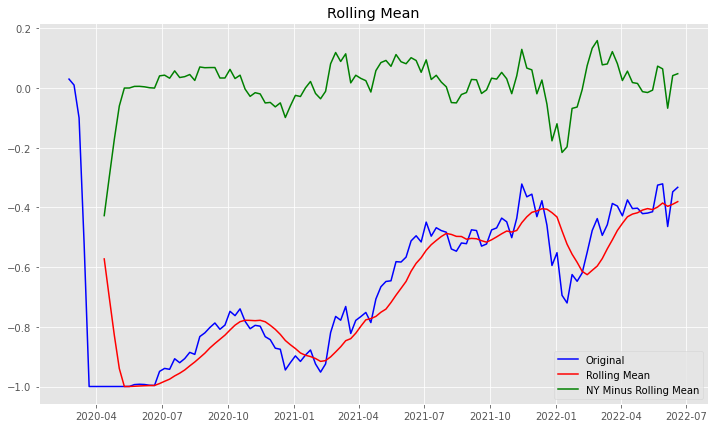

In [39]:
fig = plt.figure(figsize=(12, 7))
orig = plt.plot(NY, color='blue', label='Original')
rollmean = plt.plot(rollmean_ny, color='red', label='Rolling Mean')
avg_ny = plt.plot(ny_minus_rollmean, color='green', label='NY Minus Rolling Mean')


plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

In [40]:
dftest = adfuller(ny_minus_rollmean)
display(dftest)

(-4.205372491622158,
 0.0006452376477398833,
 3,
 111,
 {'1%': -3.490683082754047,
  '5%': -2.8879516565798817,
  '10%': -2.5808574442009578},
 -345.2342576961657)

In [41]:
#Differencing

In [42]:
diff_ny = NY.diff(periods = 8).dropna()
diff_ny

2020-04-19   -1.03
2020-04-26   -1.01
2020-05-03   -0.90
2020-05-10   -0.48
2020-05-17    0.00
2020-05-24    0.01
2020-05-31    0.01
2020-06-07    0.01
2020-06-14    0.00
2020-06-21    0.00
2020-06-28    0.05
2020-07-05    0.06
2020-07-12    0.06
2020-07-19    0.09
2020-07-26    0.07
2020-08-02    0.09
2020-08-09    0.11
2020-08-16    0.10
2020-08-23    0.12
2020-08-30    0.12
2020-09-06    0.14
2020-09-13    0.12
2020-09-20    0.11
2020-09-27    0.11
2020-10-04    0.14
2020-10-11    0.13
2020-10-18    0.09
2020-10-25    0.04
2020-11-01   -0.00
2020-11-08   -0.01
2020-11-15    0.01
2020-11-22   -0.04
2020-11-29   -0.10
2020-12-06   -0.11
2020-12-13   -0.14
2020-12-20   -0.16
2020-12-27   -0.11
2021-01-03   -0.10
2021-01-10   -0.12
2021-01-17   -0.06
2021-01-24   -0.03
2021-01-31   -0.05
2021-02-07   -0.08
2021-02-14    0.02
2021-02-21    0.10
2021-02-28    0.13
2021-03-07    0.14
2021-03-14    0.16
2021-03-21    0.06
2021-03-28    0.15
2021-04-04    0.19
2021-04-11    0.17
2021-04-18  

In [43]:
dftest = adfuller(diff_ny)
display(dftest)

(-3.8193551126288243,
 0.002715380154911479,
 8,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 -280.71501908855953)

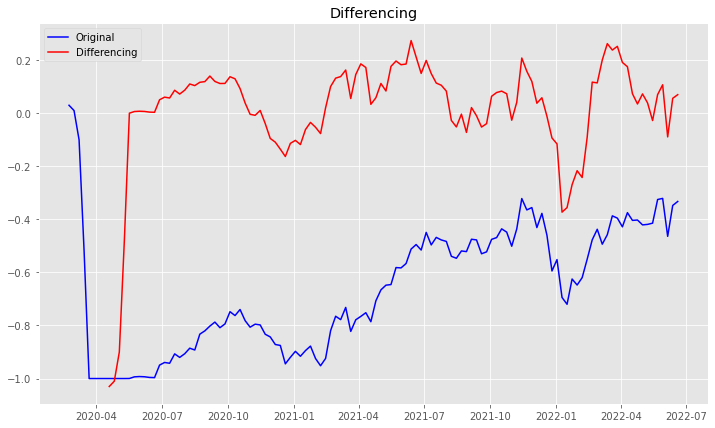

In [44]:
fig = plt.figure(figsize=(12, 7))
orig = plt.plot(NY, color='blue', label='Original')
diff = plt.plot(diff_ny, color='red', label='Differencing')
plt.legend(loc='best')
plt.title('Differencing')
plt.show(block=False)

In [45]:
autocorrelation_lag1 = NY.autocorr(lag=8)
print("Eight Week Lag: ", autocorrelation_lag1)

Eight Week Lag:  0.5683934544419356
